In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
def recolor(image, n_of_clusters):
    n = len(n_of_clusters)
    data = image 
    data = data.reshape(image.shape[0] * image.shape[1], 3)
    clusters = [KMeans(n_clusters=n_of_clusters[i]) for i in range(n)]
    for i in range(n):
        clusters[i].fit(data)
    new_colors = [clusters[i].cluster_centers_[clusters[i].predict(data)] for i in range(n)]
    image_recolored = [new_colors[i].reshape(image.shape) / 255.0 for i in range(n)]
    return clusters, image_recolored

In [3]:
def histogram(clusters):
    numLabels = np.arange(0, len(np.unique(clusters.labels_)) + 1)
    hist, _ = np.histogram(clusters.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist
def plot_colors(hist, centers):
    bar = np.zeros((100, 500, 3), dtype = "uint8")
    startX = 0
    for percent, color in zip(hist, centers):
        endX = startX + percent * 500
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 100), color.astype("uint8").tolist(), -1)
        startX = endX
    return bar

In [4]:
n_of_clusters=[4,8,16]
n = len(n_of_clusters)

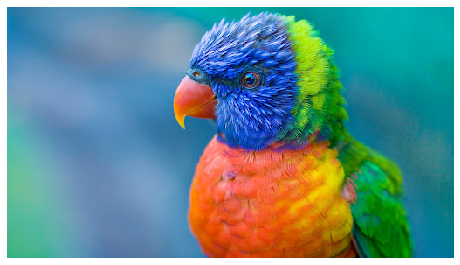

In [5]:
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(num=None, figsize=(8, 8))
plt.axis("off")
plt.imshow(image)
plt.show()

In [6]:
clusters, image_recolored = recolor(image, n_of_clusters)
hist = [histogram(clusters[i]) for i in range(n)]
bar = [plot_colors(hist[i], clusters[i].cluster_centers_) for i in range(n)]

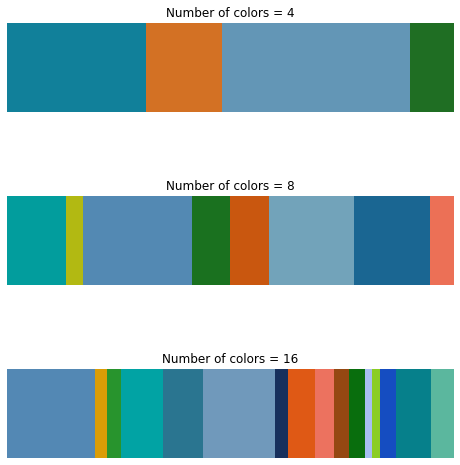

In [7]:
fig, axes = plt.subplots(nrows=n, figsize=(8, 3*n))
for i in range(n):
    axes[i].axis("off")
    axes[i].set_title("Number of colors = "+str(n_of_clusters[i]))
    axes[i].imshow(bar[i])
plt.show()

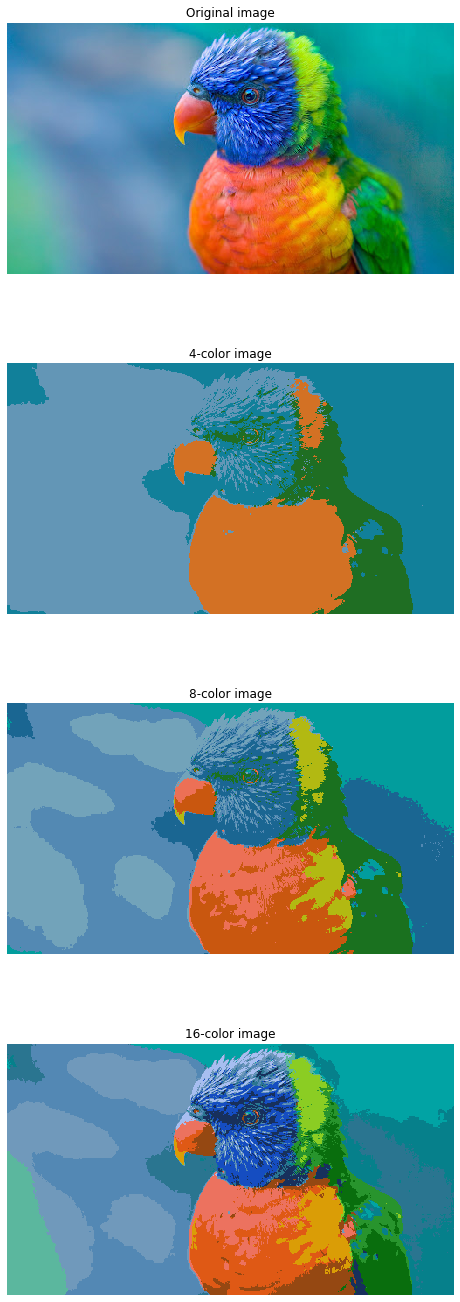

In [8]:
fig, axes = plt.subplots(nrows=n+1, figsize=(8, 8*n))
axes[0].axis("off")
axes[0].set_title("Original image")
axes[0].imshow(image)
for i in range(n):
    axes[i+1].axis("off")
    axes[i+1].set_title(str(n_of_clusters[i]) + "-color image")
    axes[i+1].imshow(image_recolored[i])
plt.show()

### Палитризуем другую картинку

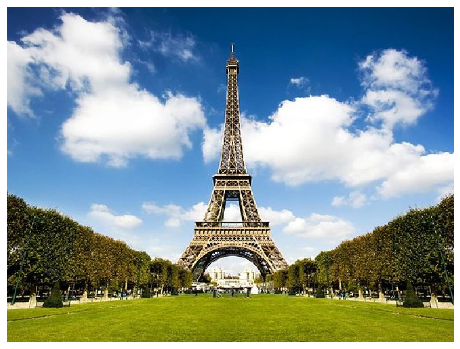

In [9]:
image1 = cv2.imread("image1.jpg")
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

plt.figure(num=None, figsize=(8, 8))
plt.axis("off")
plt.imshow(image1)
plt.show()

In [10]:
clusters1, image1_recolored = recolor(image1, n_of_clusters)
hist = [histogram(clusters1[i]) for i in range(n)]
bar = [plot_colors(hist[i], clusters1[i].cluster_centers_) for i in range(n)]

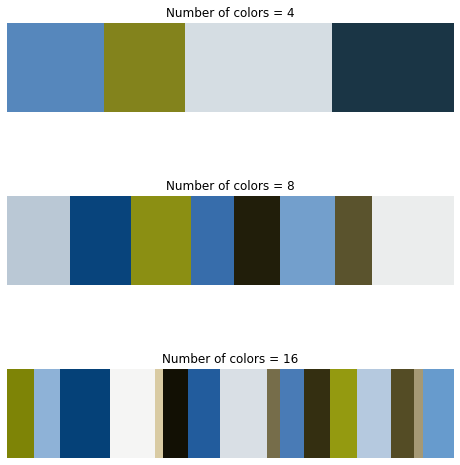

In [11]:
fig, axes = plt.subplots(nrows=n, figsize=(8, 3*n))
for i in range(n):
    axes[i].axis("off")
    axes[i].set_title("Number of colors = "+str(n_of_clusters[i]))
    axes[i].imshow(bar[i])
plt.show()

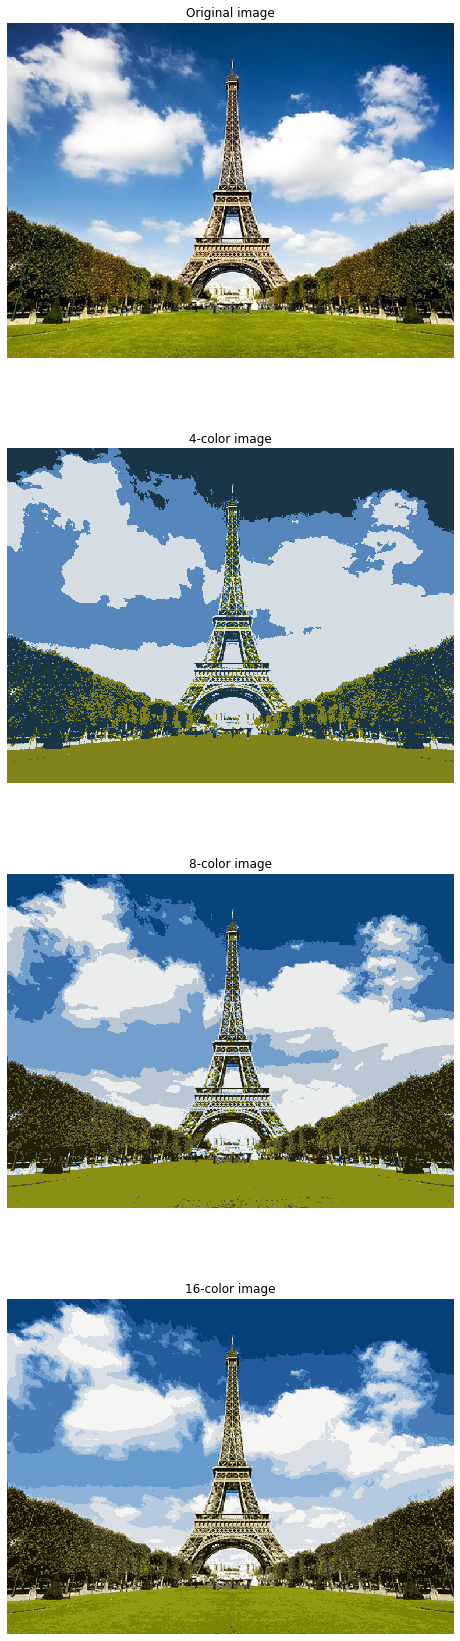

In [13]:
fig, axes = plt.subplots(nrows=n+1, figsize=(8, 10*n))
axes[0].axis("off")
axes[0].set_title("Original image")
axes[0].imshow(image1)
for i in range(n):
    axes[i+1].axis("off")
    axes[i+1].set_title(str(n_of_clusters[i]) + "-color image")
    axes[i+1].imshow(image1_recolored[i])
plt.show()